In [2]:
import numpy as np
from astropy import units as u, constants as c
import json
from glob import glob
from astropy.table import Table,Column
import random as r
import scipy.optimize as opt
from astropy.coordinates import SkyCoord
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

Reading in file with ATNF Catalog listings for binary pulsars.
Includes binary periods (pbs), companion types (comptmp), $\dot{\omega}$s (omtmp), eccentricities (ecctmp), spin periods (p0s), and pulsar names (names).

In [7]:
pbs,comptmp,omtmp,ecctmp,p0s,names,p1tmp=np.loadtxt('binary_psrcatquery.txt',usecols=[1,2,3,4,5,6,7],dtype=str,unpack=True)


Formatting the arrays, as several of the catalog values are missing/include extra information.

In [9]:
pbs=np.array(pbs.astype(float))
ctypes=[]
comps=[]
for cmp in comptmp:
    cmp_strip=cmp.split('[')[0].split('(')[0]
    if cmp_strip=='*':
        cmp_strip='Unknown'
    if cmp_strip not in ctypes:
        ctypes.append(cmp_strip)
    if cmp_strip!='*':
        comps.append(cmp_strip)
    else:
        comps.append('Unknown')
omdots,eccs=[],[]
for om,ecc in zip(omtmp,ecctmp):
    if om!='*':
        omdots.append(float(om))
    else:
        omdots.append('*')
    if ecc!='*':
        eccs.append(float(ecc))
    else:
        eccs.append('*')
ecc=[]
for v in eccs:
    if v=='*':
        ecc.append(0)
    else:
        ecc.append(v)
#omdots=np.array(omdots)
#eccs=np.array(eccs)
ctypes=np.array(ctypes)
comps=np.array(comps)
p0s=np.array(p0s.astype(float))
p1s=[]
for v in p1tmp:
    try:
        p1s.append(float(v))
    except:
        p1s.append('*')


[1.14e-20, 9.85e-20, -1.83e-21, -4.59e-20, -9.79e-21, 3.03e-20, 6.64e-19, 3.4e-20, 1.48e-19, -1.21e-19, 2.94e-19, 9.52e-20, '*', -8.66e-20, 1.84e-20, -3.52e-20, 4.97e-21, 4.46e-15, 5.16e-21, '*', 2.99e-19, 7.74e-20, '*', 1.77e-20, 2.41e-19, 7.9e-20, 5.73e-20, 1.86e-19, 4.41e-21, 7.93e-18, 1.17e-21, 7.35e-21, 4.8e-21, 1.24e-20, 9.59e-21, 1.75e-20, 4.73e-20, 2.48e-20, 3.44e-21, '*', 6.85e-19, 3.8e-19, 4.4e-20, 6.02e-21, 1.76e-18, 8.92e-16, 1.22e-20, 7.79e-21, 1.05e-16, 1.47e-19, 4.89e-20, '*', '*', '*', 1.71e-20, 2.22e-21, 4.33e-20, 6.93e-21, '*', 1.77e-20, 3e-20, 6.3e-20, 1.8e-21, 6.09e-20, 4.01e-21, 6.96e-21, 3.24e-21, 4.31e-15, 1.5e-20, 1.43e-19, 1.62e-21, 1.11e-20, 1.87e-19, 2.28e-20, 8.11e-19, 4.4e-18, 1.14e-19, '*', 2.28e-15, '*', 2.1e-20, 1.75e-20, '*', 1.77e-21, 2.47e-20, 1.86e-20, '*', 7.23e-21, 2.79e-20, 9.56e-20, '*', 6.75e-20, 1.27e-20, 1.41e-20, 6.42e-21, 2.45e-20, 1.42e-19, 9.81e-21, 8.17e-19, 2.43e-20, 3.15e-19, 2.16e-20, 1.86e-20, '*', -3.33e-21, 2.61e-20, '*', '*', 2.72e

First, the relationship between spin period and and orbital period is plotted. These points are colored by their eccentricities and shaped by their companion types. Also included on the plot is a point for the pulsar in question, J2038+35. Determining the eccentricity of the source seems as though it may uncover whether the companion is a main sequence star or a white dwarf, as points in the neighborhood of 2038 are either eccentric MS companions or circular WD companions.

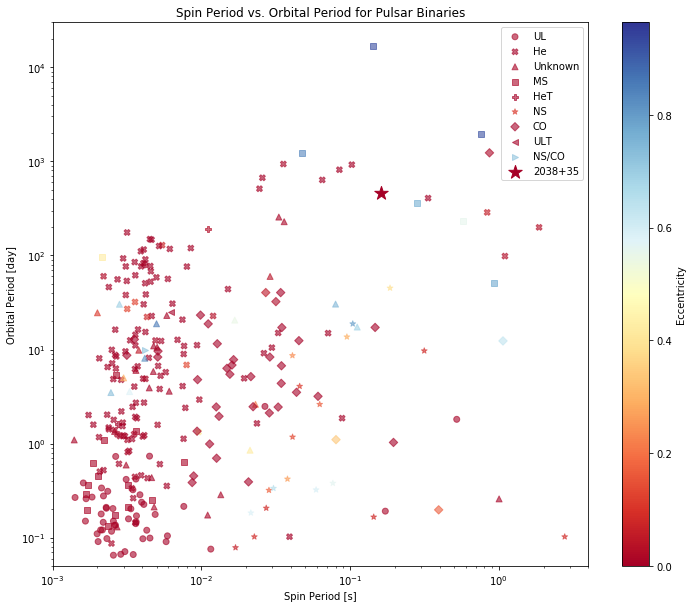

In [9]:
cm=plt.cm.get_cmap('RdYlBu')
markers=['o','X','^','s','P','*','D','<','>']
clrs=[]
for e in eccs:
    if e!='*':
        clrs.append(cm(float(e)))
    else:
        clrs.append(cm(2))
sc=plt.scatter(p0s,pbs,c=ecc,cmap=cm)
cb=plt.colorbar(sc)
plt.close()        
plt.figure(figsize=(12,10))
plt.xlabel('Spin Period [s]')
plt.ylabel('Orbital Period [day]')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(sc,label='Eccentricity')
plt.title('Spin Period vs. Orbital Period for Pulsar Binaries')
for m,ct in zip(markers,ctypes):
    cnd = np.array(comps==ct)
    plt.scatter(np.array(p0s)[cnd],np.array(pbs)[cnd],c=np.array(clrs)[cnd],cmap=cm,marker=m,label=ct,alpha=0.6)
pb_2038=462.51578189875295 
p0_2038=1/6.243567392
plt.scatter(p0_2038,pb_2038,c=mpl.colors.to_hex(cm(0)),marker='*',s=200,label='2038+35')
plt.legend()
plt.xlim([1e-3,4])
plt.ylim([5e-2,3e4])
plt.show()
#plt.savefig('p0vspb.pdf')

In [10]:
cnd = pbs > 300
print(names[cnd])

['J0214+5222' 'J0407+1607' 'J0823+0159' 'J1302-6350' 'J1638-4725'
 'J1711-4322' 'J1803-2712' 'J1823-1115' 'J1840-0643' 'J2016+1948'
 'J2032+4127' 'J2204+2700']


Next, we move onto testing the suitability of the 2038 system for tests of GR, namely the SEP. These calculations follow from Stairs et. al (2003), where the important criteria for making a binary system suitable for SEP tests include the following: 

1. P$_{\rm b}$$^2$/$e$ $>$ 10$^7$ yr$^2$. This sets the "forced" eccentricity term (the component of the eccentricity vector due to the gravitational potential of the Galaxy) to be significant enough to measure.

2. $\dot{\omega}_{\rm orbit}$ $>$ $\dot{\omega}_{\rm Galaxy}$. This implies that the projection of the Galactic gravitational acceleration is ~constant.

3. $\tau_c$ $>>$ 2$\pi$/$\dot{\omega}_{\rm orbit}$. In this limit, the time-dependent eccentricity vector is randomly oriented. For pulsars, $\tau_c$ = P/2$\dot{\rm P}$.



In [5]:
def omdot(pb,e,mc,mp=1.4):
    t0=c.G*c.M_sun/c.c**3
    if str(type(e)) in [list,np.ndarray]:
        omd_arr=[]
        for ecc in e:
            omd_arr.append(omdot(pb,e,mc,mp))
        return np.array(omd_arr)
    return (u.rad*3*t0**(2./3)*(pb/(2*np.pi))**(-5./3)*(mp+mc)**(2./3)/(1-e**2)).decompose().to('rad/s')


In [11]:
od_2317=omdot(pb=2.4593*u.day,e=5.202e-07,mc=0.1721)
e_2317=5.202e-07
pb2_e_2317=(2.4593**2)/e_2317

od_1012=omdot(pb=0.6047*u.day,e=1.301e-6,mc=0.1071)
e_1012=1.301e-6
pb2_e_1012=(0.6047**2)/e_1012

#e=np.logspace(-5,0,30)
e=np.linspace(1e-5,1,10)
od_2038=omdot(pb=462.51578189875295*u.day,e=e,mc=0.4)
pb2_e_2038=(462.51578189875295**2)/e

/Users/aemcewen/opt/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Here, we consider the first two criteria. We plot the expected $\dot{\omega}_{\rm orbit}$ for a range of eccentricities against the corresponding P$_{\rm b}^2$/$e$. The value of P$_{\rm b}$, measured from timing, is ~462.5 days. While the eccentricity is still unknown, we expect it to be fairly small, putting the system above the minimum binary orbit criteria (#1 in the above list). The second criterion is represented via the Galactic rotation rate at the position of 2038+35. This uses the DM distance (from NE2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/#los). As mentioned in Stairs et. al, binary orbital periods under 1000 days generally satisfy this constraint, which is reflected in our estimated rate plotted with a green dashed line below. Also included on this plot are points for two pulsars mentioned in the SEP section of Stairs et. al, J2317+1439 (star) and J1012+5307 (filled "+"). 

Text(0.5, 1.0, 'Equivalence Principle Criteria for J2038+35')

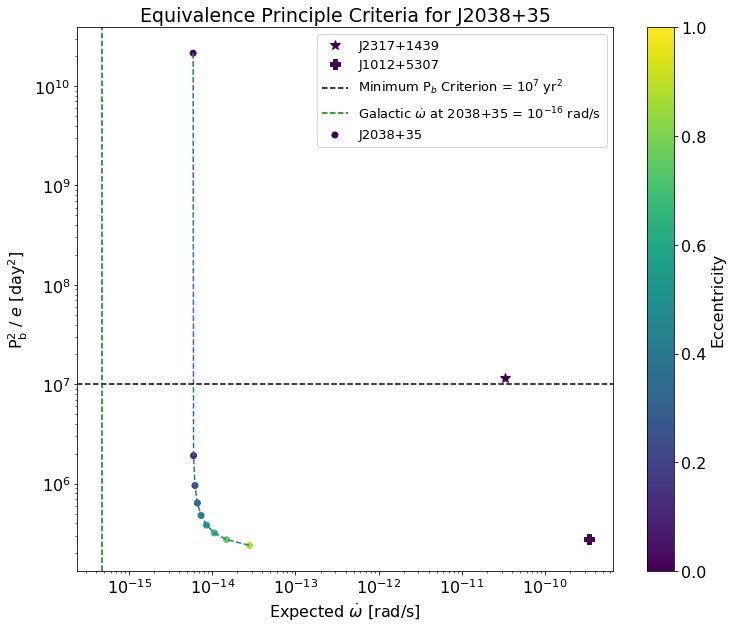

In [12]:
cm=plt.cm.get_cmap('viridis')
plt.figure(figsize=(12,10))
fs=16
plt.xscale('log')
plt.yscale('log')
plt.plot(od_2317,pb2_e_2317,marker='*',label='J2317+1439',linewidth=0,markersize=10,color=mpl.colors.to_hex(cm(e_2317)))
plt.plot(od_1012,pb2_e_1012,marker='P',label='J1012+5307',linewidth=0,markersize=10,color=mpl.colors.to_hex(cm(e_1012)))

sc=plt.scatter(od_2038,pb2_e_2038,c= [mpl.colors.to_hex(cm(v)) for v in e],label='J2038+35')
plt.plot(od_2038,pb2_e_2038,markersize=0,ls='--')

cbar=plt.colorbar(sc)
cbar.ax.tick_params(labelsize=fs)
plt.tick_params(labelsize=fs)
cbar.set_label(label='Eccentricity',fontsize=fs)
plt.xlabel(r'Expected $\dot{\omega}$ [rad/s]',fontsize=fs)
plt.ylabel(r'$\rm P_{\rm b}^2$ / $e$ [day$^2$]',fontsize=fs)
plt.axhline(y=1e7,ls='--',color='k',label=r'Minimum P$_b$ Criterion = 10$^7$ yr$^2$')
plt.axvline(x=4.7e-16,ls='--',color='green',label='Galactic $\dot{\omega}$ at 2038+35 = 10$^{-16}$ rad/s')
plt.legend(fontsize=fs-3)
plt.title('Equivalence Principle Criteria for J2038+35',fontsize=fs+3)

The final criterion is now considered. A limitation we are currently facing with timing is an inability to break degeneracies between spindown ($\dot{P}$) and position. So, we do not have a reliable measurement of $\dot{\rm P}$ - but, using criterion #3, we can set upper limits on allowed spindown such that the characteristic age $\tau_{\rm c}$ is significantly larger than the timescale of periastron advance. Note that the required spindown for low eccentricity ($\lesssim$ 10$^{-16}$) places this system in the region of the P-$\dot{\rm P}$ diagram between typical young pulsars and the branch of recycled/binary pulsars.

Text(0.5, 1.0, '$\\dot{\\rm P}$ Limit for Age Criterion')

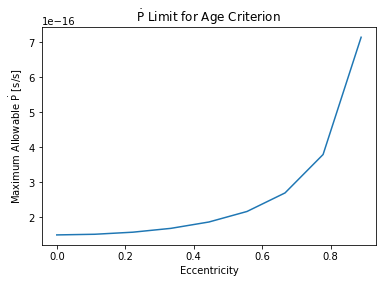

In [218]:
p0=1*u.s/6.243567392
plt.plot(e,p0*od_2038/(2*np.pi))
plt.xlabel('Eccentricity')
plt.ylabel(r'Maximum Allowable $\dot{\rm P}$ [s/s]')
plt.title(r'$\dot{\rm P}$ Limit for Age Criterion')

In [216]:
p0

<Quantity 0.16016484 s>

In [230]:
e

array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00])